In [1]:
import matplotlib.pyplot as plt
from lacbox.io import load_st

def scale_ST_data(baseline_st_data, scale_factor):
    """Applying scaling for a baseline HAWC2 ST-file.

    Parameters
    ----------
    baseline_st_data : dict
        Dict containing the baseline ST-data. The ST-data can be loaded with `lacbox.load_st`
    scale_factor : float
        Scaling factor to apply for the ST-data. If scaling factor is using rotor span it can be computed as: `scale_factor = R_new/R_old`

    Returns
    -------
    dict
        The scaled ST-data. Can be written to file with `lacbox.save_st`
    """
    st_data = dict()
    st_data["s"] = baseline_st_data["s"] * scale_factor
    st_data["m"] = baseline_st_data["m"] * scale_factor**2
    st_data["x_cg"] = baseline_st_data["x_cg"] * scale_factor
    st_data["y_cg"] = baseline_st_data["y_cg"] * scale_factor
    st_data["ri_x"] = baseline_st_data["ri_x"] * scale_factor
    st_data["ri_y"] = baseline_st_data["ri_y"] * scale_factor
    st_data["x_sh"] = baseline_st_data["x_sh"] * scale_factor
    st_data["y_sh"] = baseline_st_data["y_sh"] * scale_factor
    st_data["E"] = baseline_st_data["E"]
    st_data["G"] = baseline_st_data["G"]
    st_data["I_x"] = baseline_st_data["I_x"] * scale_factor**4
    st_data["I_y"] = baseline_st_data["I_y"] * scale_factor**4
    st_data["I_p"] = baseline_st_data["I_p"] * scale_factor**4
    st_data["k_x"] = baseline_st_data["k_x"]
    st_data["k_y"] = baseline_st_data["k_y"]
    st_data["A"] = baseline_st_data["A"] * scale_factor**2
    st_data["pitch"] = baseline_st_data["pitch"]
    st_data["x_e"] = baseline_st_data["x_e"] * scale_factor
    st_data["y_e"] = baseline_st_data["y_e"] * scale_factor
    return st_data

# Fancy Plot

In [2]:
import matplotlib
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])


# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'

In [3]:
# Baseline ST-data (DTU 10MW)
path_st_file_DTU10MW = "../../data/DTU_10MW_RWT_Blade_st.dat"
st_data_DTU10MW = load_st(path_st_file_DTU10MW, 0, 0)  # Baseline data

# Scaling factor
R_old = 89.16
R_new = 92.50  # !! Use your own values !!
scale_factor = R_new / R_old

# Scaling ST-data
st_data = scale_ST_data(st_data_DTU10MW, scale_factor)

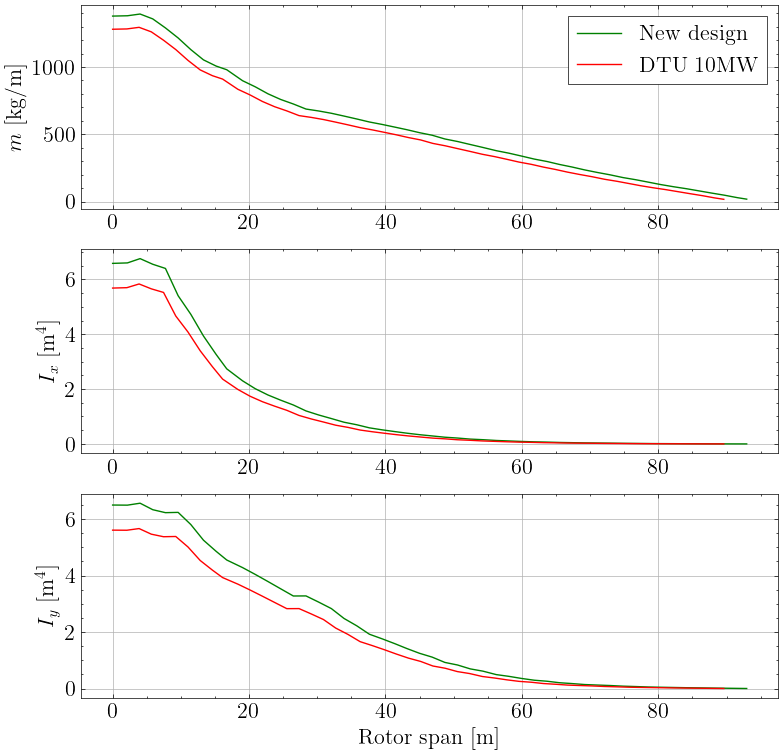

In [7]:
# Plotting m, I_x, I_y, I_p, S_chord, S_thickness
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

# m_d
ax = axs[0]
ax.plot(st_data["s"], st_data["m"], c='green', label="New design")
ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["m"], c='red', label="DTU 10MW")
ax.set_ylabel("$m$ [kg/m]")
ax.grid()
legend = ax.legend(fancybox=False, edgecolor="black")
legend.get_frame().set_linewidth(0.5)

# I_x
ax = axs[1]
ax.plot(st_data["s"], st_data["I_x"], c='green', label="New design")
ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_x"], c='red', label="DTU 10MW")
ax.set_ylabel("$I_x$ [m$^4$]")
ax.grid()

# I_y
ax = axs[2]
ax.plot(st_data["s"], st_data["I_y"], c='green', label="New design")
ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_y"], c='red', label="DTU 10MW")
ax.set_ylabel("$I_y$ [m$^4$]")
ax.set_xlabel("Rotor span [m]")
ax.grid()

plt.savefig('mass_and_inertia.pdf', dpi=300, bbox_inches='tight')